In [19]:
import geopandas as gpd
import pandas as pd

In [27]:
regions = gpd.read_file("/home/shihsir/Desktop/Codes/Geospatial/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

epsg:32630


In [21]:
facilities_df = pd.read_csv("/home/shihsir/Desktop/Codes/Geospatial/ghana/ghana/health_facilities.csv")
facilities_df

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098
...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,Ackaakrom CHPS,CHPS,Ackaakrom,Government,NaN,NaN
3752,Western,Sefwi-Akontombra,Apprutu CHPS,CHPS,Apprutu,Government,NaN,NaN
3753,Western,Sefwi-Akontombra,Kojokrom CHPS,CHPS,Kojokrom,Government,NaN,NaN
3754,Western,Sefwi-Akontombra,Yawkrom CHPS,CHPS,Yawkrom,Government,NaN,NaN


In [23]:
facilities = gpd.GeoDataFrame(facilities_df, 
                              geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))
facilities.crs = {'init': 'epsg:4326'}
facilities.head()

/home/shihsir/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


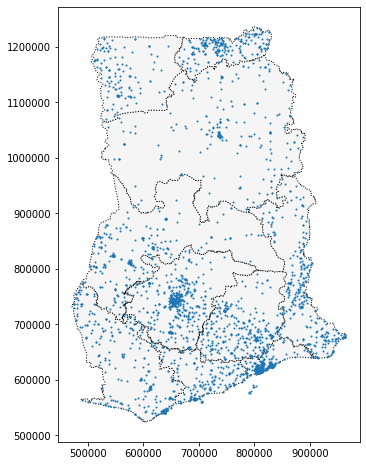

In [10]:
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [14]:
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In [15]:
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


In [16]:
facilities.geometry.x.head()

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [17]:
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: epsg:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
